In [ ]:
import pandas as pd


# **넷째마당 대중교통 데이터 프로젝트**

### **Unit 11. 대중교통 데이터 시각화하기**

In [ ]:
subway_data = pd.read_csv('subwayfee.csv', encoding = 'cp949')
subway_data

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764
1,2019-01,1호선,151,시청,676932,676266,102388,101033
2,2019-01,1호선,152,종각,1240810,1177643,162410,152062
3,2019-01,1호선,153,종로3가,703110,674148,387062,362735
4,2019-01,1호선,154,종로5가,571824,583955,275447,263687
...,...,...,...,...,...,...,...,...
593,2019-01,우이신설선,4709,북한산보국문,131839,117790,40396,40629
594,2019-01,우이신설선,4710,정릉,83527,73090,43457,41092
595,2019-01,우이신설선,4711,성신여대입구(돈암),77040,89799,31555,29648
596,2019-01,우이신설선,4712,보문,31502,32724,15900,16109


In [ ]:
print(subway_data['유임승차'] / subway_data['무임승차'])
print('')
print(subway_data['유임승차'] / (subway_data['유임승차'] + subway_data['무임승차']))

0      6.856190
1      6.611439
2      7.639985
3      1.816531
4      2.075986
         ...   
593    3.263665
594    1.922061
595    2.441451
596    1.981258
597    1.956611
Length: 598, dtype: float64

0      0.872712
1      0.868619
2      0.884259
3      0.644953
4      0.674901
         ...   
593    0.765460
594    0.657776
595    0.709425
596    0.664571
597    0.661775
Length: 598, dtype: float64


교재에선 0으로 나눌 수 없다는 오류 메시지가 등장했지만 판다스의 경우 그대로 계산되어 저장됩니다.  
아래 'inf'는 계산값이 무한대, infinity라는 의미입니다.

In [ ]:
(subway_data['유임승차'] / subway_data['무임승차']).max()

inf

때문에 여기서도 두번째 계산 방식을 통해 최대값을 구해보겠습니다.

In [ ]:
(subway_data['유임승차'] / (subway_data['유임승차'] + subway_data['무임승차'])).max()

1.0

위의 정보에서는 최대 값은 구할 수 있어도 인덱스를 바로 알기 힘들 것 같습니다..  
한가지 더 과정을 거쳐주겠습니다.

In [ ]:
rate_table = pd.DataFrame(subway_data['유임승차'] / (subway_data['유임승차'] + subway_data['무임승차']), columns = ['rate'])
rate_table

,rate
0,0.872712
1,0.868619
2,0.884259
3,0.644953
4,0.674901
...,...
593,0.765460
594,0.657776
595,0.709425
596,0.664571


위에서 만든 데이터프레임을 subway_data 데이터프레임에 새로운 열로 추가한 뒤 출력해 보겠습니다.  
추가할 수 있는 함수는 여러가지가 있습니다. 여기에선 가장 기본적인 concat을 사용해 보겠습니다.  
concat은 기본적으로 밑으로 이어붙이기 때문에 이번엔 axis 파라미터를 주었습니다.

In [ ]:
added_subway = pd.concat([subway_data, rate_table], axis = 1)
added_subway

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,rate
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764,0.872712
1,2019-01,1호선,151,시청,676932,676266,102388,101033,0.868619
2,2019-01,1호선,152,종각,1240810,1177643,162410,152062,0.884259
3,2019-01,1호선,153,종로3가,703110,674148,387062,362735,0.644953
4,2019-01,1호선,154,종로5가,571824,583955,275447,263687,0.674901
...,...,...,...,...,...,...,...,...,...
593,2019-01,우이신설선,4709,북한산보국문,131839,117790,40396,40629,0.765460
594,2019-01,우이신설선,4710,정릉,83527,73090,43457,41092,0.657776
595,2019-01,우이신설선,4711,성신여대입구(돈암),77040,89799,31555,29648,0.709425
596,2019-01,우이신설선,4712,보문,31502,32724,15900,16109,0.664571


위에서 구했던 max값이 1이라는 의미는 무엇일까요?  
유임승차인원과 유임승차 + 무임승차 인원이 같다는 것은 무임 승차 인원이 없다는 의미일 것 같습니다.  
확인을 위해 승하차 인원 비율이 1인 역들의 목록을 뽑아보겠습니다.

In [ ]:
added_subway[added_subway['rate'] == added_subway['rate'].max()]

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,rate
192,2019-01,경원선,1022,창동,19,0,0,0,1.0
237,2019-01,분당선,1031,복정,25,0,0,0,1.0
266,2019-01,일산선,1949,지축,2,0,0,0,1.0
328,2019-01,경의선,1291,서울역,11,0,0,0,1.0
329,2019-01,경의선,1293,홍대입구,2,0,0,0,1.0
330,2019-01,경의선,1295,김포공항,10,0,0,0,1.0
331,2019-01,경의선,1296,계양,7,0,0,0,1.0
332,2019-01,경의선,1297,검암,5,0,0,0,1.0


이번에는 승하차 인원이 가장 많은 역을 찾도록 하겠습니다.  
이전에 보았던 행을 읽어오는 함수 loc / iloc를 이용해 여러 열을 선택하는 방법입니다.  
다만 이번에는 인덱스가 아닌 컬럼명으로 불러오는 loc를 사용해보겠습니다.

In [ ]:
added_subway[added_subway['rate'] == added_subway['rate'].max()]

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,rate
192,2019-01,경원선,1022,창동,19,0,0,0,1.0
237,2019-01,분당선,1031,복정,25,0,0,0,1.0
266,2019-01,일산선,1949,지축,2,0,0,0,1.0
328,2019-01,경의선,1291,서울역,11,0,0,0,1.0
329,2019-01,경의선,1293,홍대입구,2,0,0,0,1.0
330,2019-01,경의선,1295,김포공항,10,0,0,0,1.0
331,2019-01,경의선,1296,계양,7,0,0,0,1.0
332,2019-01,경의선,1297,검암,5,0,0,0,1.0


마찬가지로 이전에 보았던 값을 더해주는 함수 sum을 통해 원하는 데이터를 뽑아보겠습니다.

In [ ]:
added_subway.loc[:, ['유임승차', '유임하차', '무임승차', '무임하차']].sum(axis = 1)

0      3349860
1      1556619
2      2732925
3      2127055
4      1694913
        ...   
593     330654
594     241166
595     228042
596      96235
597     114446
Length: 598, dtype: int64

이번에는 데이터프레임끼리 합치는 것이 아닌 데이터만 추가하는 방식으로 하겠습니다.
insert 함수는 특정 열 자리에 집어넣을 수 있습니다. '지하철역'과 '유임승차'사이에 넣어보도록 하겠습니다.


In [ ]:
added_subway.insert(4, '총이용객', added_subway.loc[:, ['유임승차', '유임하차', '무임승차', '무임하차']].sum(axis = 1))

In [ ]:
added_subway.head()

,사용월,호선명,역ID,지하철역,총이용객,유임승차,유임하차,무임승차,무임하차,rate
0,2019-01,1호선,150,서울역,3349860,1516452,1400464,221180,211764,0.872712
1,2019-01,1호선,151,시청,1556619,676932,676266,102388,101033,0.868619
2,2019-01,1호선,152,종각,2732925,1240810,1177643,162410,152062,0.884259
3,2019-01,1호선,153,종로3가,2127055,703110,674148,387062,362735,0.644953
4,2019-01,1호선,154,종로5가,1694913,571824,583955,275447,263687,0.674901


사용자가 가장 많은 역은 위에서 나온 것과 동일한 방법으로 찾을 수 있습니다.

In [ ]:
added_subway[added_subway['총이용객'] == added_subway['총이용객'].max()]

,사용월,호선명,역ID,지하철역,총이용객,유임승차,유임하차,무임승차,무임하차,rate
31,2019-01,2호선,222,강남,6718007,3153418,3210437,186486,167666,0.944164


unit 11 가장 마지막 유무임승하차 비율을 역별로 파이차트로 나타내는 것은 1개만 보이고 생략하도록 하겠습니다.


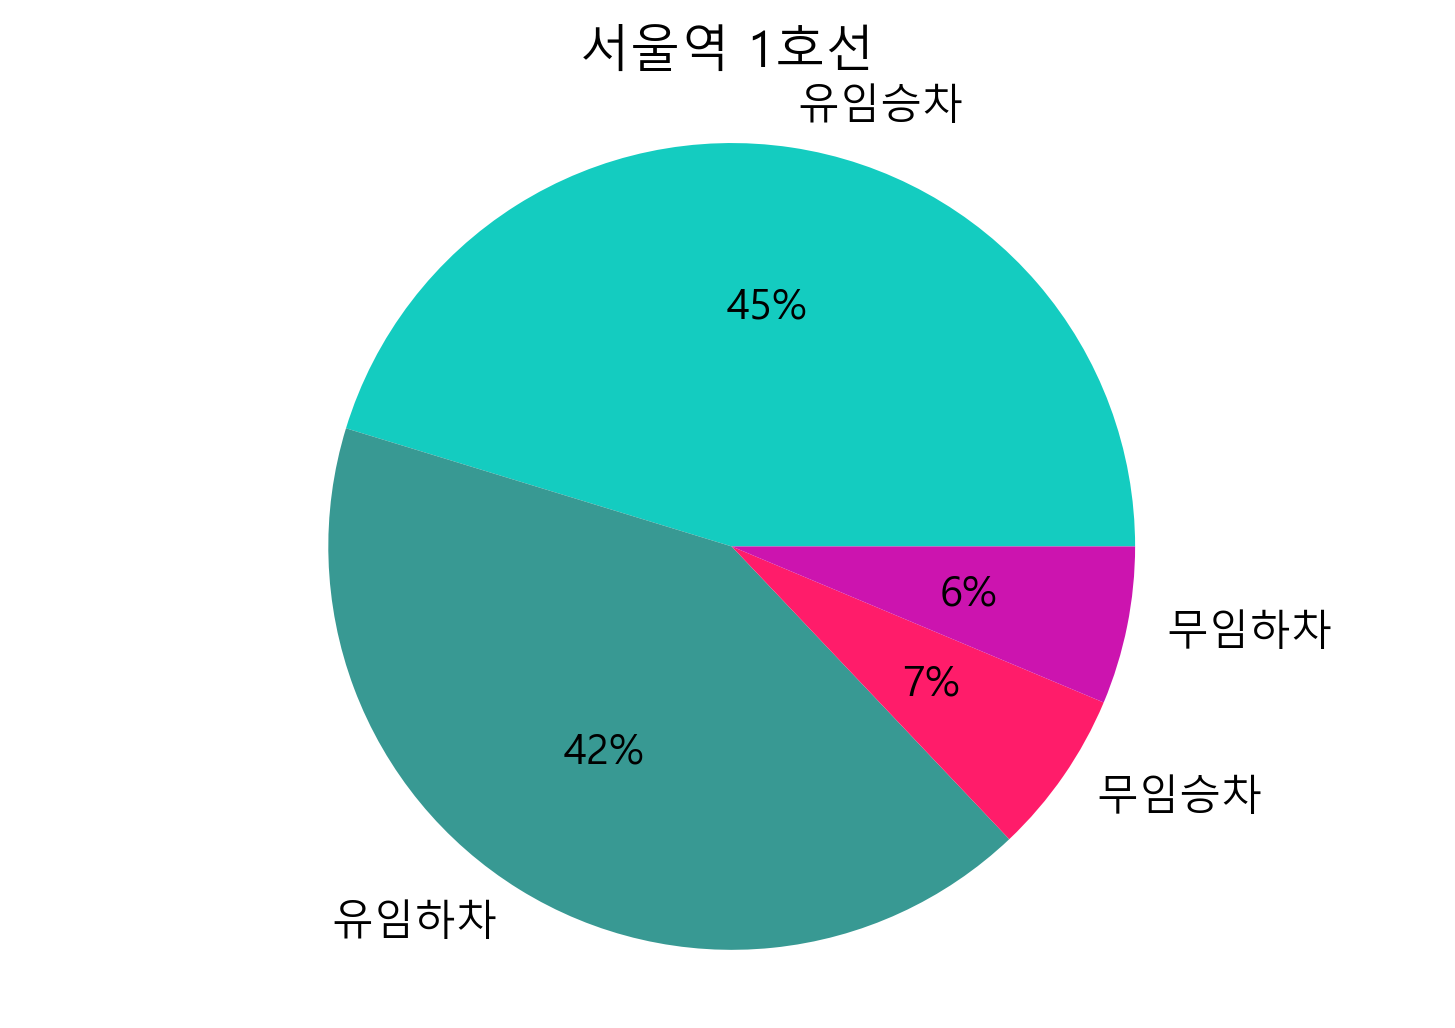

In [ ]:
import matplotlib.pyplot as plt
sample_subway = subway_data.iloc[0]

label = ['유임승차', '유임하차', '무임승차', '무임하차']
c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']

plt.rc('font', family='Malgun Gothic')
plt.figure(dpi = 300)
plt.title(sample_subway[3] + ' ' + sample_subway[1])
plt.pie(sample_subway[4:8], labels = label, colors = c, autopct = '%1.f%%')
plt.axis('equal')
plt.show()

In [ ]:
time_data = pd.read_csv('subwaytime.csv', encoding = 'cp949')
time_data

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,2019-01,1호선,150.0,서울역,927,22,10682,8774,13504,45545,...,33149,19442,3612,7167,0,410,0,0,0,0
2,2019-01,1호선,151.0,시청,74,0,2409,4049,3532,19241,...,14478,4079,981,1256,3,29,0,0,0,0
3,2019-01,1호선,152.0,종각,100,8,4409,5105,4593,26969,...,54264,5560,4886,1722,0,0,0,0,0,0
4,2019-01,1호선,153.0,종로3가,122,4,5061,2520,3876,12832,...,25970,5503,3214,2471,0,52,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2019-01,우이신설선,4709.0,북한산보국문,5,3,1907,561,6026,2270,...,1450,6536,450,1940,0,0,0,0,0,0
595,2019-01,우이신설선,4710.0,정릉,3,0,1508,625,4799,1809,...,869,3595,287,1133,0,0,0,0,0,0
596,2019-01,우이신설선,4711.0,성신여대입구(돈암),2,0,769,281,1172,931,...,3149,2152,648,662,0,0,0,0,0,0
597,2019-01,우이신설선,4712.0,보문,0,0,407,190,770,928,...,575,1179,135,456,0,1,0,0,0,0


컬럼명이 엉망으로 꼬여있습니다.  
승하차가 적힌 행을 지우고 컬럼명을 바꿔주도록 하겠습니다.  
우선 컬럼명부터 만들어두겠습니다.

In [ ]:
column_names = ['사용월', '호선명', '역ID', '지하철역']
for i in range(4, 24):
    column_names.append(str(i) + '시 승차')
    column_names.append(str(i) + '시 하차')

for i in range(0,4):
    column_names.append(str(i) + '시 승차')
    column_names.append(str(i) + '시 하차')

In [ ]:
time_data.columns = column_names
time_data

,사용월,호선명,역ID,지하철역,4시 승차,4시 하차,5시 승차,5시 하차,6시 승차,6시 하차,...,23시 승차,23시 하차,0시 승차,0시 하차,1시 승차,1시 하차,2시 승차,2시 하차,3시 승차,3시 하차
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,2019-01,1호선,150.0,서울역,927,22,10682,8774,13504,45545,...,33149,19442,3612,7167,0,410,0,0,0,0
2,2019-01,1호선,151.0,시청,74,0,2409,4049,3532,19241,...,14478,4079,981,1256,3,29,0,0,0,0
3,2019-01,1호선,152.0,종각,100,8,4409,5105,4593,26969,...,54264,5560,4886,1722,0,0,0,0,0,0
4,2019-01,1호선,153.0,종로3가,122,4,5061,2520,3876,12832,...,25970,5503,3214,2471,0,52,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2019-01,우이신설선,4709.0,북한산보국문,5,3,1907,561,6026,2270,...,1450,6536,450,1940,0,0,0,0,0,0
595,2019-01,우이신설선,4710.0,정릉,3,0,1508,625,4799,1809,...,869,3595,287,1133,0,0,0,0,0,0
596,2019-01,우이신설선,4711.0,성신여대입구(돈암),2,0,769,281,1172,931,...,3149,2152,648,662,0,0,0,0,0,0
597,2019-01,우이신설선,4712.0,보문,0,0,407,190,770,928,...,575,1179,135,456,0,1,0,0,0,0


이번엔 행을 삭제하겠습니다.  
행을 삭제하는 함수는 drop() 함수로 여기에서도 행의 이름과 행의 인덱스 두가지 방법을 사용할 수 있습니다.  
먼저 drop 함수에 대해서 소개하겠습니다.  
drop 함수는 입력한 행 이름을 삭제한 데이터프레임을 반환합니다.  
즉, 이것을 사용하기 위해선 다음과 같이 변수로 저장해 주어야 사용할 수 있습니다.  
df = df.drop([행이름1, 행이름2...])  
drop 함수는 위와같이 기본적으로 행을 삭제합니다만 axis = 1 파라미터를 추가하거나 columns = [컬럼명1, 컬럼명2...] 를 입력해주면 열을 삭제해줍니다.  

In [ ]:
#먼저 행 이름을 이용해 삭제해 보겠습니다.

time_data = time_data.drop([0])
time_data

,사용월,호선명,역ID,지하철역,4시 승차,4시 하차,5시 승차,5시 하차,6시 승차,6시 하차,...,23시 승차,23시 하차,0시 승차,0시 하차,1시 승차,1시 하차,2시 승차,2시 하차,3시 승차,3시 하차
1,2019-01,1호선,150.0,서울역,927,22,10682,8774,13504,45545,...,33149,19442,3612,7167,0,410,0,0,0,0
2,2019-01,1호선,151.0,시청,74,0,2409,4049,3532,19241,...,14478,4079,981,1256,3,29,0,0,0,0
3,2019-01,1호선,152.0,종각,100,8,4409,5105,4593,26969,...,54264,5560,4886,1722,0,0,0,0,0,0
4,2019-01,1호선,153.0,종로3가,122,4,5061,2520,3876,12832,...,25970,5503,3214,2471,0,52,0,0,0,0
5,2019-01,1호선,154.0,종로5가,43,2,1934,3590,2935,14991,...,12013,3450,785,980,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2019-01,우이신설선,4709.0,북한산보국문,5,3,1907,561,6026,2270,...,1450,6536,450,1940,0,0,0,0,0,0
595,2019-01,우이신설선,4710.0,정릉,3,0,1508,625,4799,1809,...,869,3595,287,1133,0,0,0,0,0,0
596,2019-01,우이신설선,4711.0,성신여대입구(돈암),2,0,769,281,1172,931,...,3149,2152,648,662,0,0,0,0,0,0
597,2019-01,우이신설선,4712.0,보문,0,0,407,190,770,928,...,575,1179,135,456,0,1,0,0,0,0


이번에는 행의 인덱스로 삭제하는 방법을 소개하겠습니다.
이 방법은 위의 방법을 응용해 행의 인덱스를 입력해 행의 이름을 알아내고 이를 입력하는 방법입니다.
하지만 이미 첫번째 행을 날려버린 상태이기 때문에 변수에 저장하진 않겠습니다.


In [ ]:
print(time_data.index[0])

1


In [ ]:
time_data.drop([time_data.index[0]])

,사용월,호선명,역ID,지하철역,4시 승차,4시 하차,5시 승차,5시 하차,6시 승차,6시 하차,...,23시 승차,23시 하차,0시 승차,0시 하차,1시 승차,1시 하차,2시 승차,2시 하차,3시 승차,3시 하차
2,2019-01,1호선,151.0,시청,74,0,2409,4049,3532,19241,...,14478,4079,981,1256,3,29,0,0,0,0
3,2019-01,1호선,152.0,종각,100,8,4409,5105,4593,26969,...,54264,5560,4886,1722,0,0,0,0,0,0
4,2019-01,1호선,153.0,종로3가,122,4,5061,2520,3876,12832,...,25970,5503,3214,2471,0,52,0,0,0,0
5,2019-01,1호선,154.0,종로5가,43,2,1934,3590,2935,14991,...,12013,3450,785,980,1,3,0,0,0,0
6,2019-01,1호선,155.0,동대문,621,7,15328,2164,10315,6673,...,7712,13475,1071,4691,3,35,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2019-01,우이신설선,4709.0,북한산보국문,5,3,1907,561,6026,2270,...,1450,6536,450,1940,0,0,0,0,0,0
595,2019-01,우이신설선,4710.0,정릉,3,0,1508,625,4799,1809,...,869,3595,287,1133,0,0,0,0,0,0
596,2019-01,우이신설선,4711.0,성신여대입구(돈암),2,0,769,281,1172,931,...,3149,2152,648,662,0,0,0,0,0,0
597,2019-01,우이신설선,4712.0,보문,0,0,407,190,770,928,...,575,1179,135,456,0,1,0,0,0,0


실은 여기에서 사용할 수 있는 한가지 방법이 더 있습니다.  
바로 '사용월', '호선명', '역ID', '지하철역' 열의 데이터가 NaN이란 것을 이용해 dropna() 함수를 사용해 주는 것입니다.  
물론 아래의 경우는 이미 제거된 상태이기 때문에 별다른 변화는 없을 것입니다.

In [ ]:
time_data.dropna()

,사용월,호선명,역ID,지하철역,4시 승차,4시 하차,5시 승차,5시 하차,6시 승차,6시 하차,...,23시 승차,23시 하차,0시 승차,0시 하차,1시 승차,1시 하차,2시 승차,2시 하차,3시 승차,3시 하차
1,2019-01,1호선,150.0,서울역,927,22,10682,8774,13504,45545,...,33149,19442,3612,7167,0,410,0,0,0,0
2,2019-01,1호선,151.0,시청,74,0,2409,4049,3532,19241,...,14478,4079,981,1256,3,29,0,0,0,0
3,2019-01,1호선,152.0,종각,100,8,4409,5105,4593,26969,...,54264,5560,4886,1722,0,0,0,0,0,0
4,2019-01,1호선,153.0,종로3가,122,4,5061,2520,3876,12832,...,25970,5503,3214,2471,0,52,0,0,0,0
5,2019-01,1호선,154.0,종로5가,43,2,1934,3590,2935,14991,...,12013,3450,785,980,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2019-01,우이신설선,4709.0,북한산보국문,5,3,1907,561,6026,2270,...,1450,6536,450,1940,0,0,0,0,0,0
595,2019-01,우이신설선,4710.0,정릉,3,0,1508,625,4799,1809,...,869,3595,287,1133,0,0,0,0,0,0
596,2019-01,우이신설선,4711.0,성신여대입구(돈암),2,0,769,281,1172,931,...,3149,2152,648,662,0,0,0,0,0,0
597,2019-01,우이신설선,4712.0,보문,0,0,407,190,770,928,...,575,1179,135,456,0,1,0,0,0,0


데이터를 확인하시면 시간 데이터가 오브젝트, 여기에서는 문자열로 표시되는 것을 볼 수 있습니다.  
또한 승하차 데이터 역시 오브젝트로 저장이 되어있는데 이를 int로 바꿔주겠습니다.

In [ ]:
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 1 to 598
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용월     598 non-null    object 
 1   호선명     598 non-null    object 
 2   역ID     598 non-null    float64
 3   지하철역    598 non-null    object 
 4   4시 승차   598 non-null    object 
 5   4시 하차   598 non-null    object 
 6   5시 승차   598 non-null    object 
 7   5시 하차   598 non-null    object 
 8   6시 승차   598 non-null    object 
 9   6시 하차   598 non-null    object 
 10  7시 승차   598 non-null    object 
 11  7시 하차   598 non-null    object 
 12  8시 승차   598 non-null    object 
 13  8시 하차   598 non-null    object 
 14  9시 승차   598 non-null    object 
 15  9시 하차   598 non-null    object 
 16  10시 승차  598 non-null    object 
 17  10시 하차  598 non-null    object 
 18  11시 승차  598 non-null    object 
 19  11시 하차  598 non-null    object 
 20  12시 승차  598 non-null    object 
 21  12시 하차  598 non-null    object 
 22  13

자료형을 int로 바꾸겠습니다.  
apply와 lambda 함수의 조합을 응용할 수도 있겠지만 데이터 타입을 바꾸는 것은 astype() 함수를 통해 간단히 적용할 수 있습니다.
원하는 열을 선택하는 것은 이전 unit을 확인해 주세요.

In [ ]:
time_data.iloc[:, range(4, 52)] = time_data.iloc[:, range(4, 52)].astype(int)
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 1 to 598
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용월     598 non-null    object 
 1   호선명     598 non-null    object 
 2   역ID     598 non-null    float64
 3   지하철역    598 non-null    object 
 4   4시 승차   598 non-null    int32  
 5   4시 하차   598 non-null    int32  
 6   5시 승차   598 non-null    int32  
 7   5시 하차   598 non-null    int32  
 8   6시 승차   598 non-null    int32  
 9   6시 하차   598 non-null    int32  
 10  7시 승차   598 non-null    int32  
 11  7시 하차   598 non-null    int32  
 12  8시 승차   598 non-null    int32  
 13  8시 하차   598 non-null    int32  
 14  9시 승차   598 non-null    int32  
 15  9시 하차   598 non-null    int32  
 16  10시 승차  598 non-null    int32  
 17  10시 하차  598 non-null    int32  
 18  11시 승차  598 non-null    int32  
 19  11시 하차  598 non-null    int32  
 20  12시 승차  598 non-null    int32  
 21  12시 하차  598 non-null    int32  
 22  13

출근 시간대 사람들이 가장 많이 타고 내리는 역을 찾아보겠습니다.  
출근 시간대는 임의로 7시부터 9시까지로 잡겠습니다.  
먼저 해당 시간대의 데이터만 추려보겠습니다.

In [ ]:
time_data.iloc[:, range(10, 16)]

,7시 승차,7시 하차,8시 승차,8시 하차,9시 승차,9시 하차
1,39110,103863,80492,236747,61108,163026
2,7703,66876,9978,209349,12818,88793
3,6733,104259,11028,300081,14563,167611
4,6066,29381,9735,84155,14261,100477
5,5143,40376,8509,132808,12652,78635
...,...,...,...,...,...,...
594,20034,3613,23966,7142,16032,5573
595,12345,2999,14421,5144,12191,4131
596,3373,3424,6730,8021,4488,6949
597,1868,2159,3949,5117,2915,3447


아래와 같이 단순히 max 함수를 적용해 찾기에는 승차인원과 하차인원이 분리되어 있습니다.  
승하차 인원을 합산해서 포함시켜줄 필요가 있을 것 같습니다.

In [ ]:
time_data.iloc[:, range(10, 16)].max()

7시 승차    243083
7시 하차    184588
8시 승차    355172
8시 하차    449728
9시 승차    211286
9시 하차    420878
dtype: int32

rush_data라는 데이터 프레임을 만든 후 승하차 시간을 합산한 데이터를 추가해 주는 방식으로 만들어보겠습니다.

In [ ]:
rush_data = time_data.iloc[:, range(0,4)]
rush_data

,사용월,호선명,역ID,지하철역
1,2019-01,1호선,150.0,서울역
2,2019-01,1호선,151.0,시청
3,2019-01,1호선,152.0,종각
4,2019-01,1호선,153.0,종로3가
5,2019-01,1호선,154.0,종로5가
...,...,...,...,...
594,2019-01,우이신설선,4709.0,북한산보국문
595,2019-01,우이신설선,4710.0,정릉
596,2019-01,우이신설선,4711.0,성신여대입구(돈암)
597,2019-01,우이신설선,4712.0,보문


데이터 만드는 것 자체는 어렵지 않습니다.  


In [ ]:
print(time_data.iloc[:, [10, 11]].sum(axis = 1))
print('')
print(type(time_data.iloc[:, [10, 11]].sum(axis = 1)))

1      142973
2       74579
3      110992
4       35447
5       45519
        ...  
594     23647
595     15344
596      6797
597      4027
598      5271
Length: 598, dtype: int64

<class 'pandas.core.series.Series'>


위에서 뽑아낸 데이터는 시리즈임을 알 수 있지만 concat 함수는 데이터프레임 + 데이터프레임 꼴이 아닌 데이터프레임 + 시리즈 꼴에도 다음과 같이 적용됩니다.

In [ ]:
pd.concat([rush_data, time_data.iloc[:, [10, 11]].sum(axis = 1)], axis = 1)

,사용월,호선명,역ID,지하철역,0
1,2019-01,1호선,150.0,서울역,142973
2,2019-01,1호선,151.0,시청,74579
3,2019-01,1호선,152.0,종각,110992
4,2019-01,1호선,153.0,종로3가,35447
5,2019-01,1호선,154.0,종로5가,45519
...,...,...,...,...,...
594,2019-01,우이신설선,4709.0,북한산보국문,23647
595,2019-01,우이신설선,4710.0,정릉,15344
596,2019-01,우이신설선,4711.0,성신여대입구(돈암),6797
597,2019-01,우이신설선,4712.0,보문,4027


위의 방식은 코드도 길고 컬럼명을 입력하기도 불편합니다.  
때문에 시리즈 데이터를 컬럼명까지 입혀 아래와 같이 데이터프레임으로 변환한 다음 붙여주겠습니다.

In [ ]:
temp_data = pd.DataFrame(time_data.iloc[:, [10, 11]].sum(axis = 1), columns = ['7시 승하차'])
pd.concat([rush_data, temp_data], axis = 1)

,사용월,호선명,역ID,지하철역,7시 승하차
1,2019-01,1호선,150.0,서울역,142973
2,2019-01,1호선,151.0,시청,74579
3,2019-01,1호선,152.0,종각,110992
4,2019-01,1호선,153.0,종로3가,35447
5,2019-01,1호선,154.0,종로5가,45519
...,...,...,...,...,...
594,2019-01,우이신설선,4709.0,북한산보국문,23647
595,2019-01,우이신설선,4710.0,정릉,15344
596,2019-01,우이신설선,4711.0,성신여대입구(돈암),6797
597,2019-01,우이신설선,4712.0,보문,4027


아래 코드는 위의 과정을 for문으로 반복시켜주는 코드입니다.

In [ ]:
n = 7
for i in range(10, 16, 2):
    columns_name = str(n) + '시 승하차'
    temp_data = pd.DataFrame(time_data.iloc[:, [i, i+1]].sum(axis = 1), columns = [columns_name])
    rush_data = pd.concat([rush_data, temp_data], axis = 1)
    n += 1

rush_data

,사용월,호선명,역ID,지하철역,7시 승하차,8시 승하차,9시 승하차
1,2019-01,1호선,150.0,서울역,142973,317239,224134
2,2019-01,1호선,151.0,시청,74579,219327,101611
3,2019-01,1호선,152.0,종각,110992,311109,182174
4,2019-01,1호선,153.0,종로3가,35447,93890,114738
5,2019-01,1호선,154.0,종로5가,45519,141317,91287
...,...,...,...,...,...,...,...
594,2019-01,우이신설선,4709.0,북한산보국문,23647,31108,21605
595,2019-01,우이신설선,4710.0,정릉,15344,19565,16322
596,2019-01,우이신설선,4711.0,성신여대입구(돈암),6797,14751,11437
597,2019-01,우이신설선,4712.0,보문,4027,9066,6362


그럼 위에서 잘 만든 데이터에서 최대값을 찾아보겠습니다.

In [ ]:
rush_data.iloc[:, [4, 5, 6]].max()

7시 승하차    277203
8시 승하차    496208
9시 승하차    489474
dtype: int64

8시 승하차 데이터가 가장 크군요.  
그럼 어느 역인지 확인해 보겠습니다.

In [ ]:
rush_data[rush_data['8시 승하차'] == rush_data.iloc[:, [4, 5, 6]].max()[1]]

,사용월,호선명,역ID,지하철역,7시 승하차,8시 승하차,9시 승하차
42,2019-01,2호선,232.0,구로디지털단지,228557,496208,314340


2호선의 구로디지털단지 역이었습니다.  
역 정보만을 뽑아내기 위해선 간단하게 아래와 같이 열을 선택해주면 됩니다.

In [ ]:
rush_data[rush_data['8시 승하차'] == rush_data.iloc[:, [4, 5, 6]].max()[1]]['지하철역']

42    구로디지털단지
Name: 지하철역, dtype: object

교재에서 나온 밤 11시에 사람들이 가장 많이 타는 역, 시간대별로 사람들이 가장 많이 타고 내리는 역, 시간대별로 하차인원이 가장 많은 역 등등은 위의 코드를 변형하면 충분히 풀 수 있기 때문에 생략하도록 하겠습니다.  
가장 마지막 문제인 지하철 시간대별 승하차 인원 추이만을 그려보도록 하겠습니다.

In [ ]:
get_on_data = time_data.iloc[:, range(4,52,2)]
get_on_data

,4시 승차,5시 승차,6시 승차,7시 승차,8시 승차,9시 승차,10시 승차,11시 승차,12시 승차,13시 승차,...,18시 승차,19시 승차,20시 승차,21시 승차,22시 승차,23시 승차,0시 승차,1시 승차,2시 승차,3시 승차
1,927,10682,13504,39110,80492,61108,68446,89100,98021,101282,...,249973,142575,97729,96955,70982,33149,3612,0,0,0
2,74,2409,3532,7703,9978,12818,16470,22512,26040,34728,...,170225,76142,57394,58745,38156,14478,981,3,0,0
3,100,4409,4593,6733,11028,14563,20165,34617,42088,59893,...,257735,134259,113555,135586,111743,54264,4886,0,0,0
4,122,5061,3876,6066,9735,14261,24063,42723,58902,76615,...,129847,95225,68613,76067,62004,25970,3214,0,0,0
5,43,1934,2935,5143,8509,12652,20434,31918,45533,60255,...,133826,72550,49690,40800,32727,12013,785,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,5,1907,6026,20034,23966,16032,11575,10094,10578,10393,...,9285,5727,3596,3164,2412,1450,450,0,0,0
595,3,1508,4799,12345,14421,12191,8907,8136,8205,8206,...,7603,4398,2767,2642,1778,869,287,0,0,0
596,2,769,1172,3373,6730,4488,4092,4808,6279,6548,...,9918,6987,6234,7200,6686,3149,648,0,0,0
597,0,407,770,1868,3949,2915,2689,2557,2992,3450,...,4602,2759,1930,1528,1351,575,135,0,0,0


In [ ]:
get_off_data = time_data.iloc[:, range(5,52,2)]
get_off_data

,4시 하차,5시 하차,6시 하차,7시 하차,8시 하차,9시 하차,10시 하차,11시 하차,12시 하차,13시 하차,...,18시 하차,19시 하차,20시 하차,21시 하차,22시 하차,23시 하차,0시 하차,1시 하차,2시 하차,3시 하차
1,22,8774,45545,103863,236747,163026,86198,80051,85869,91792,...,105075,77807,55056,46680,35481,19442,7167,410,0,0
2,0,4049,19241,66876,209349,88793,49343,45645,41405,46800,...,28331,15634,9141,8204,6345,4079,1256,29,0,0
3,8,5105,26969,104259,300081,167611,80474,76633,71920,75678,...,83206,51603,19039,12188,8286,5560,1722,0,0,0
4,4,2520,12832,29381,84155,100477,87040,96552,101213,103649,...,62455,37346,14242,10422,7761,5503,2471,52,0,0
5,2,3590,14991,40376,132808,78635,62671,69919,72651,69005,...,40675,24744,10816,7410,5112,3450,980,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,3,561,2270,3613,7142,5573,4994,4640,5777,6365,...,19016,18482,11747,10684,9988,6536,1940,0,0,0
595,0,625,1809,2999,5144,4131,3439,3646,4800,5392,...,13516,12582,7761,6912,6250,3595,1133,0,0,0
596,0,281,931,3424,8021,6949,6527,6282,7306,8423,...,12496,9495,4863,4105,3293,2152,662,0,0,0
597,0,190,928,2159,5117,3447,2362,2317,2564,2562,...,4235,3100,2037,2087,1872,1179,456,1,0,0


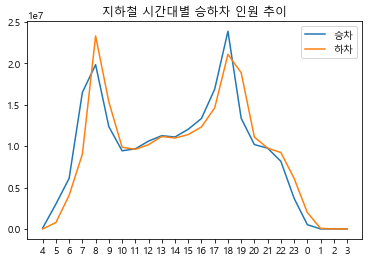

In [ ]:
plt.rc('font', family='Malgun Gothic')
plt.title('지하철 시간대별 승하차 인원 추이')
plt.plot(range(24), get_on_data.sum(), label = '승차')
plt.plot(range(24), get_off_data.sum(), label = '하차')
plt.legend()
plt.xticks(range(24), list(range(4,24)) + [0, 1, 2, 3])
plt.show()